In [1]:
import torch
import matplotlib.pyplot as plt

data = torch.load("alpha_1e-3/loss_log.pt")


folder = "../../test_case_4/"
gt_initial_beam = torch.load(folder + "ground_truth_dist.pt")

from torch_track import Beam
defaults = {
    "s": torch.tensor(0.0).float(),
    "p0c": torch.tensor(10.0e6).float(),
    "mc2": torch.tensor(0.511e6).float(),
}

gt_initial_beam = Beam(gt_initial_beam, **defaults)

In [2]:
# get predicted covariances
cov = torch.cat([ele[-1].unsqueeze(0) for ele in data[::10]])

# get gt cov
gt_cov = torch.cov(gt_initial_beam.data.T)
gt_rms = torch.diag(gt_cov)

gt_emits = []
for i in range(3):
    g = i*2
    gt_emits.append(torch.det(gt_cov[g:g+2,g:g+2]).sqrt())


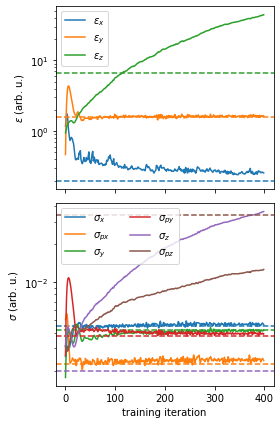

In [3]:
# plot emit_x
emits = []
for i in range(3):
    g = i*2
    emits.append(torch.det(cov[:, g:g+2,g:g+2]).sqrt())

fig,(ax, ax2) = plt.subplots(2,1, sharex="all")
fig.set_size_inches(4,6)
labels = ["x", "y", "z"]
mean_energy = 10
scale = 1e6
for i in range(3):
    ax.semilogy(emits[i].cpu().detach() * scale / mean_energy,
                label=f"$\epsilon_{labels[i]}$",
                c=f"C{i}")
    ax.axhline(gt_emits[i].cpu().detach() * scale / mean_energy,ls='--',c=f"C{i}")

sigmas = []
labels = ["x", "px", "y", "py", "z", "pz"]
for i in range(6):
    sigmas.append(cov[:,i,i].sqrt())
    ax2.semilogy(sigmas[-1].cpu().detach(),label=f"$\sigma_{{{labels[i]}}}$",
                c=f"C{i}")
    ax2.axhline(gt_rms[i].sqrt(), ls='--', c=f"C{i}")

ax.set_ylabel("$\epsilon$ (arb. u.)")
ax2.set_ylabel("$\sigma$ (arb. u.)")
ax2.set_xlabel("training iteration")
ax.legend()
ax2.legend(ncol=2, loc=2)
fig.tight_layout()
fig.savefig("convergence.svg")


tensor(0.0023, dtype=torch.float64)


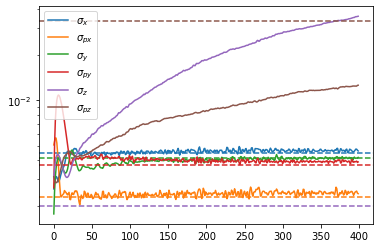

In [4]:
sigmas = []
fig,ax = plt.subplots()
labels = ["x", "px", "y", "py", "z", "pz"]
for i in range(6):
    sigmas.append(cov[:,i,i].sqrt())
    ax.semilogy(sigmas[-1].cpu().detach(),label=f"$\sigma_{{{labels[i]}}}$",
                c=f"C{i}")
    ax.axhline(gt_rms[i].sqrt(), ls='--', c=f"C{i}")

print(gt_rms[-i].sqrt())
ax.legend()